In [ ]:
#Importing all the required libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

In [ ]:
#Loading the dataset into variable dataset and printing it.
dataset = pd.read_csv('/content/covid.csv')
print(dataset)

    Person  Age  CasesArea  Covid
0        1   60       4000      1
1        2   25        750      0
2        3   45       1000      0
3        4   50       5000      1
4        5   90       1000      1
5        6   60       5500      1
6        7   29        500      0
7        8   35       3500      0
8        9   60        600      0
9       10   40       3300      0
10      11   58       3500      1
11      12   25       2500      0
12      13   45       3000      0
13      14   50       1000      0
14      15   60       1000      0
15      16   75       3800      1
16      17   35       1700      0
17      18   52       2700      0
18      19   70       5000      1
19      20   50       1500      0
20      21   25       2000      0
21      22   30       2000      0
22      23   21       2300      0
23      24   44       4000      0
24      25   48       4500      1
25      26   65       5000      1
26      27   53       4000      0
27      28   29       2000      0
28      29   6

In [ ]:
#Extracting the input and output from the dataset into variables x and y.
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
#Scaling the input data and splitting the data into training and testing data.
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [ ]:
#Defining the model with rbf kernel.
classifier=SVC(kernel='rbf',random_state=45)

In [ ]:
#Training the model on the training data.
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=45, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Predicting the x_test values and storing it in y_pred and displaying it.
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
#Calculating and displaying the accuracy of our model.
accuracy_score(y_test,y_pred)*100

92.3076923076923

In [ ]:
#Confusion matrix of the predictions.
confusion_matrix(y_test, y_pred)

array([[7, 0],
       [1, 5]])

In [ ]:
#Classification report of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.83      0.91         6

    accuracy                           0.92        13
   macro avg       0.94      0.92      0.92        13
weighted avg       0.93      0.92      0.92        13



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


<function matplotlib.pyplot.show>

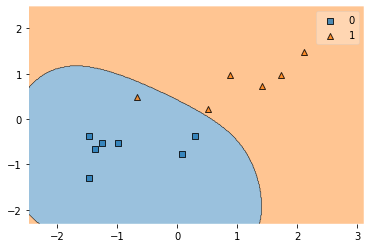

In [ ]:
#Plotting the decision boundary.
plot_decision_regions(x_test,y_test,clf=classifier)
plt.show